# <u>Random Forest</u>


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Primero se cargan los conjuntos de datos.

In [2]:
# Conjunto de datos de prueba
df_test = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_test.csv')
df_test.head()

,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
0,1237656906355048679,359.882500,-1.011695,19.34624,18.21367,17.75281,17.43699,17.23576,18.259090,51.824020,...,20.46436,19.85486,19.57471,0.349946,0.336899,0.342106,0.336519,0.316463,0.076849,0.000012
1,1237648721225711796,168.508873,-0.007002,20.08095,18.58526,17.82388,17.35917,17.01471,9.279436,36.803690,...,19.69541,18.53301,18.33405,0.300323,0.292062,0.304036,0.311175,0.337448,0.072482,0.000009
2,1237655473438851815,260.209844,26.321156,22.92703,20.01030,18.46797,17.73924,17.28094,0.645773,9.904737,...,22.06661,19.84510,19.27482,0.137121,0.679532,0.661082,0.665039,0.767354,0.323387,0.000057
3,1237651274034184295,125.648654,52.388509,19.28477,17.77666,16.92267,16.47363,16.18417,19.322850,77.505940,...,19.22704,17.94705,17.69468,0.597250,0.874807,0.918937,0.889690,0.838195,0.091731,0.000010
4,1237661125612142849,125.846050,25.560856,18.64250,17.84922,17.69156,17.56612,17.48753,34.913430,72.495770,...,18.96511,18.79242,18.83481,0.421484,0.418764,0.461124,0.467602,0.421164,0.027804,0.000006


In [3]:
# Conjunto de datos de entrenamiento
df_train = pd.read_csv('/home/carolina/Escritorio/Astrometria/practicos/Astrometria-2025/practico5_astrometria/galaxy_forming_burst_train.csv')
df_train.head()


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
0,1237663542066479839,316.862138,-0.895678,19.01775,17.64755,17.06249,16.70350,16.49018,24.71067,87.29298,...,19.10930,18.70515,0.671345,0.651463,0.666413,0.690870,0.621546,0.096112,0.000009,1
1,1237655124482064438,206.623360,3.878296,17.04417,15.99764,15.55414,15.37217,15.18734,152.17130,398.97420,...,18.04992,17.76888,0.367797,0.279793,0.260749,0.232302,0.240708,0.017826,0.000006,0
2,1237655501889667673,258.396808,29.744604,19.07817,17.60122,16.84234,16.36071,16.06588,23.37314,91.09844,...,18.18285,17.70473,0.292335,0.307789,0.323592,0.328726,0.323058,0.080695,0.000008,1
3,1237648722837700815,171.667200,1.135270,18.92527,17.69376,16.97346,16.52742,16.25693,26.90786,83.65588,...,17.73501,17.39894,0.648844,0.734394,0.779769,0.773851,0.777902,0.137939,0.000008,0
4,1237655469672890715,229.001991,2.406898,18.13839,16.88722,16.26597,15.89510,15.62886,55.54449,175.83760,...,18.22657,17.90952,0.443804,0.372774,0.364403,0.368019,0.372280,0.038428,0.000008,1


## `Graficos con analisis exploratorio de Datos`

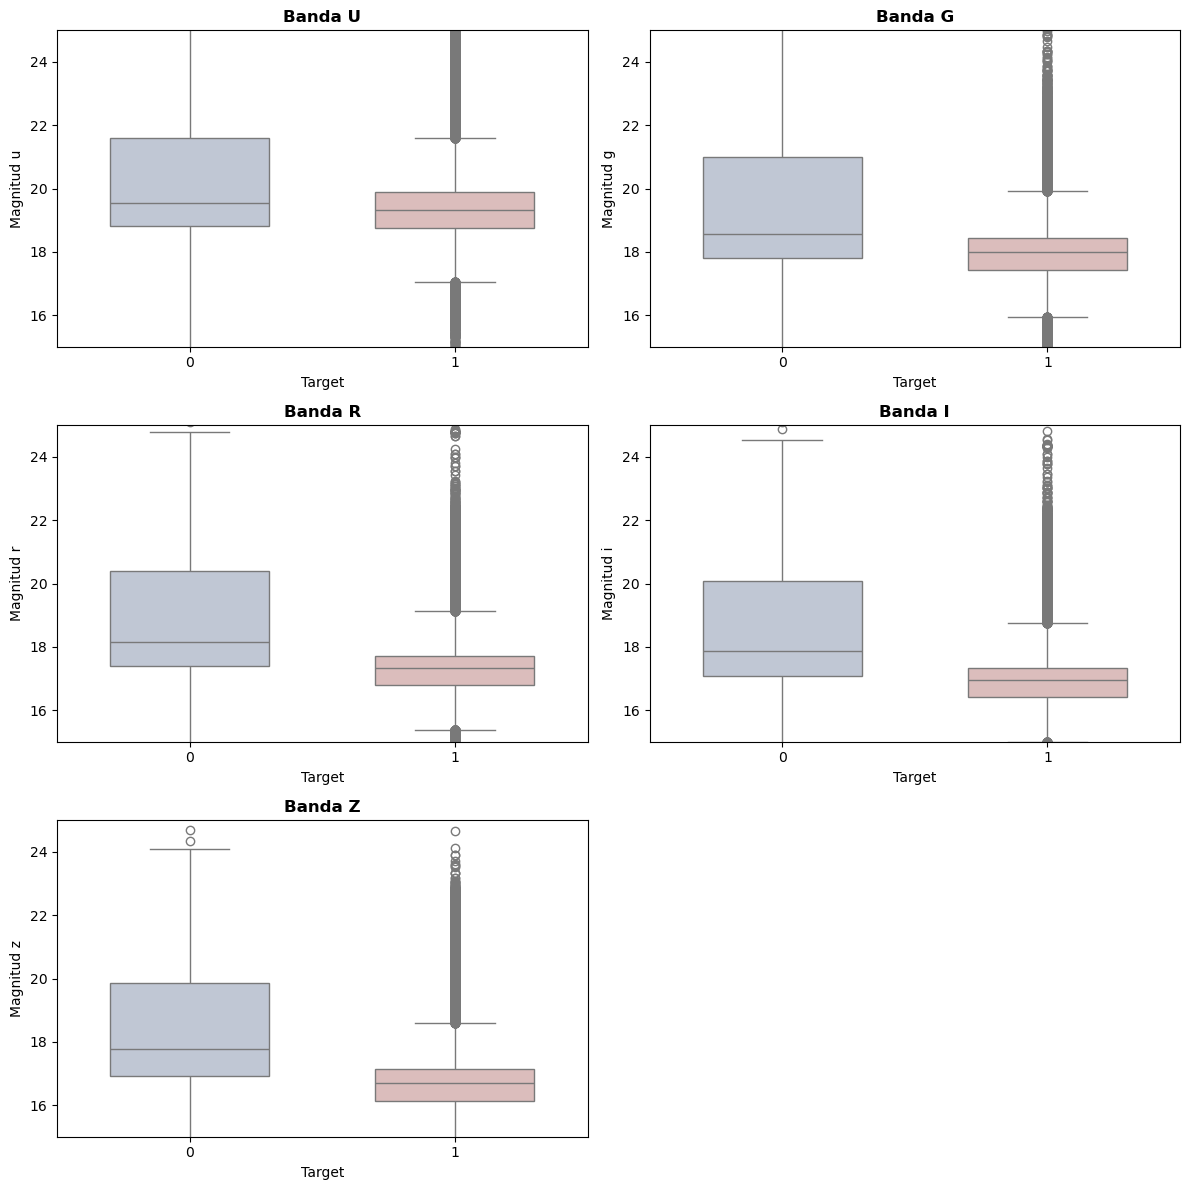

In [4]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
bands = ['u', 'g', 'r', 'i', 'z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'Magnitud {band}', fontsize=10)
    axes[idx].set_ylim(15, 25)

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

Los gráficos muestran claramente las diferencias en las distribuciones de magnitudes entre las dos clases de galaxias (target 0 y 1) para cada banda fotométrica. Se observa clara separacion entre las clases.

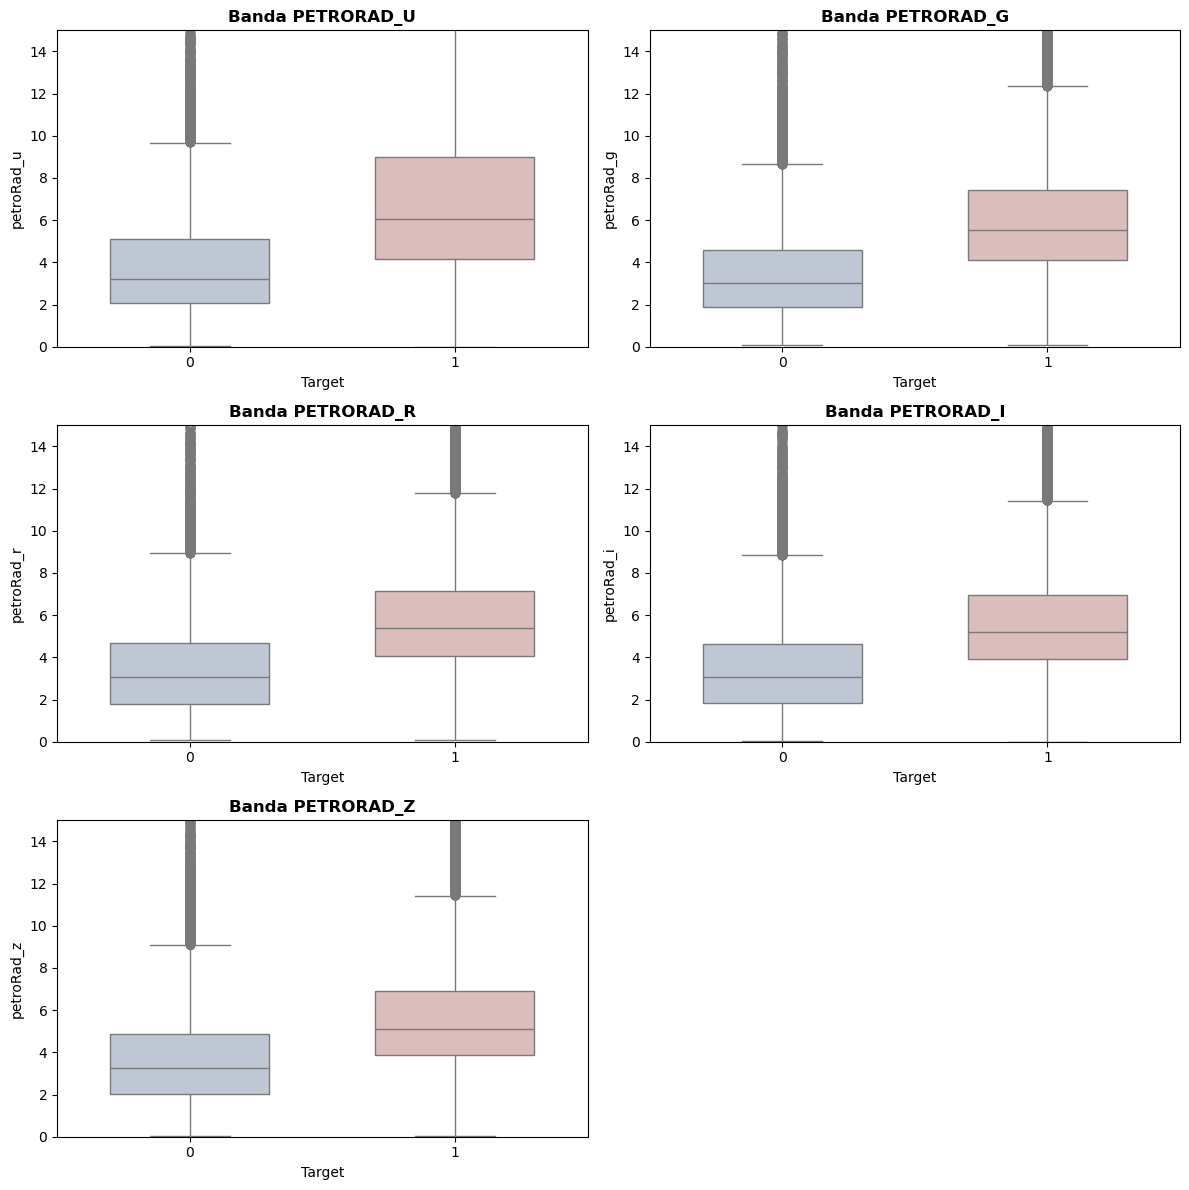

In [5]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
petroRad_bands = ['petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(petroRad_bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'{band}', fontsize=10)
    # Ajustar el rango del eje Y
    axes[idx].set_ylim(0, 15)  

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

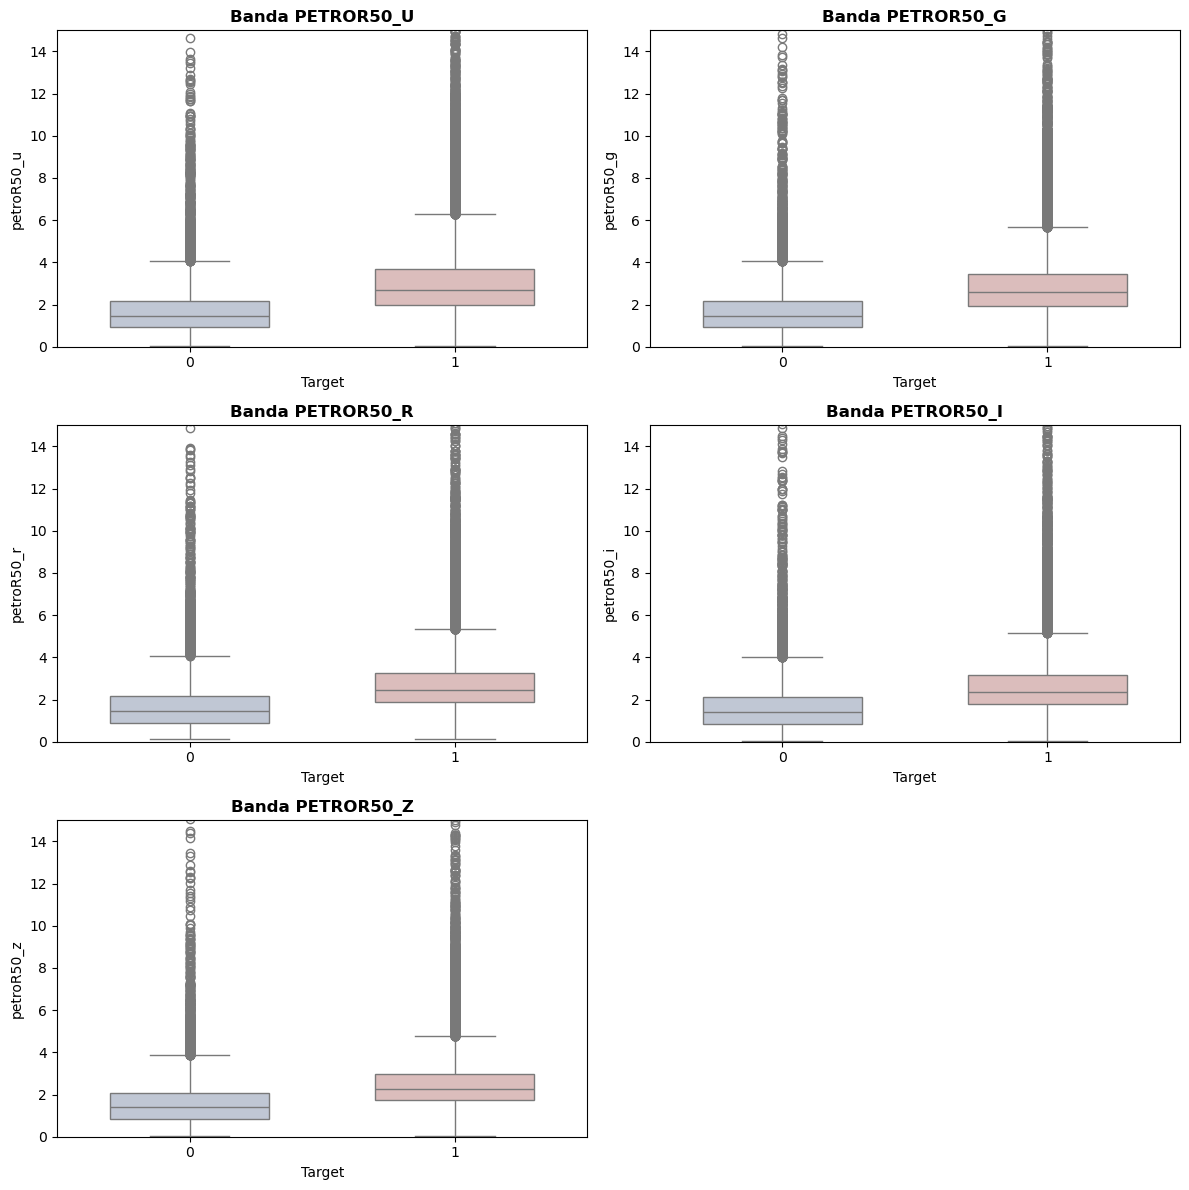

In [6]:
# Crear figura con subplots para las 5 bandas (3 filas x 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
petroR50_bands = ['petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z']

# Aplanar el array de axes para iterar fácilmente
axes = axes.flatten()

for idx, band in enumerate(petroR50_bands):
    sns.boxplot(data=df_train, x="target", y=band, hue="target", 
                width=.6, palette="vlag", legend=False, ax=axes[idx])
    axes[idx].set_title(f'Banda {band.upper()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Target', fontsize=10)
    axes[idx].set_ylabel(f'{band}', fontsize=10)
    # Ajustar el rango del eje Y
    axes[idx].set_ylim(0, 15)  

# Eliminar el último subplot (posición 6) ya que solo tenemos 5 bandas
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

(0.0, 6e-05)

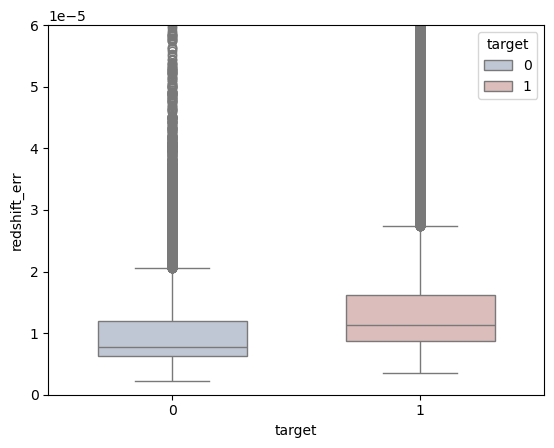

In [7]:
sns.boxplot(df_train, x="target", y="redshift_err", hue="target", width=.6, palette="vlag")
plt.ylim(0.0, 0.00006)

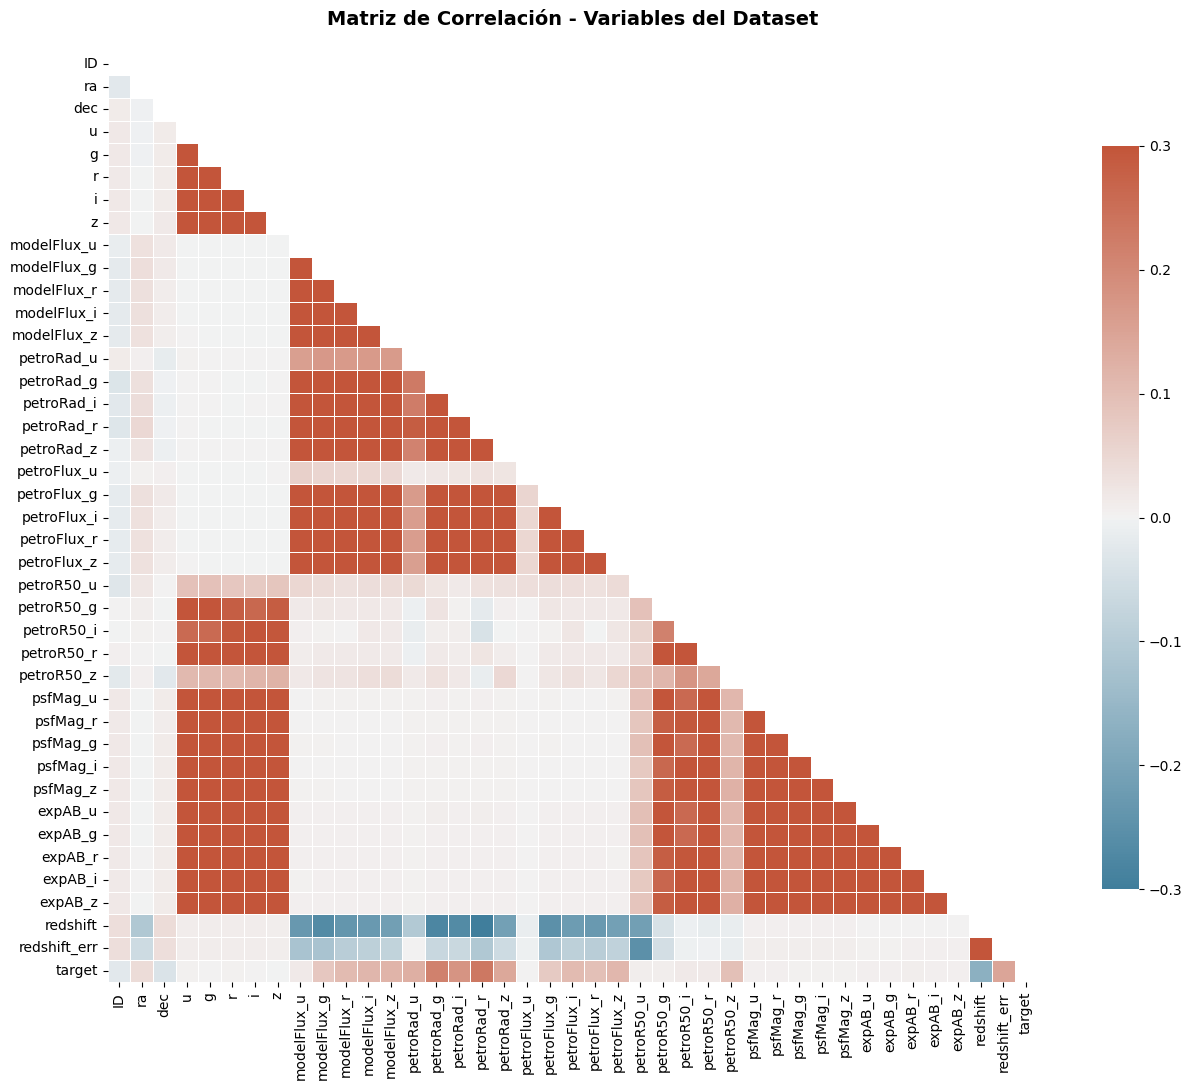

In [8]:
# Calcular la matriz de correlación
matriz_correlacion = df_train.corr()

# Generar una máscara para el triángulo superior (evitar duplicados)
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(14, 11))

# Generar un mapa de colores divergente personalizado
mapa_colores = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el heatmap con la máscara y aspecto correcto
sns.heatmap(matriz_correlacion, mask=mascara, cmap=mapa_colores, 
            vmin=-0.3, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot=False, fmt='.2f')

plt.title('Matriz de Correlación - Variables del Dataset', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Variables importantes para clasificación:

-Las variables con correlación moderada con target son las más útiles para el modelo
-Redshift muestra algunas correlaciones interesantes con otras variables

Multicolinealidad:

-Hay mucha multicolinealidad (variables muy correlacionadas entre sí). Esto puede afectar algunos modelos, pero Random Forest maneja bien la multicolinealidad

### Análisis de Correlaciones con Target

Antes de entrenar el modelo Random Forest, es fundamental entender **qué variables tienen mayor relación con nuestra variable objetivo (target)**. Esto nos permite:

1. **Identificar las características más predictivas**: Variables con correlación moderada-alta son las que mejor distinguen entre clases
2. **Detectar variables redundantes**: Si dos variables están muy correlacionadas entre sí, aportan información similar
3. **Optimizar el modelo**: Podemos priorizar o eliminar variables según su poder predictivo
4. **Entender el problema**: Las correlaciones nos dan insights sobre qué características físicas diferencian a las galaxias

#### ¿Qué buscamos en las correlaciones con target?

- **Correlación moderada: La variable es útil pero no redundante
- **Correlación baja: Poco poder predictivo, puede añadir ruido
- **Correlación muy alta: Posible data leakage o redundancia

A continuación, calculamos y visualizamos las correlaciones de todas las variables con `target` para identificar cuáles son las más importantes para nuestro modelo de clasificación.

CORRELACIÓN DE VARIABLES CON TARGET (ordenadas)
target          1.000000
petroRad_r      0.233720
petroRad_g      0.214498
petroRad_i      0.178160
redshift_err    0.147438
petroRad_z      0.141290
petroRad_u      0.127965
modelFlux_z     0.118146
modelFlux_i     0.112880
petroFlux_z     0.112112
petroFlux_i     0.104896
modelFlux_r     0.103338
petroFlux_r     0.094990
petroR50_z      0.094759
modelFlux_g     0.079974
petroFlux_g     0.077029
ra              0.042059
modelFlux_u     0.016205
petroR50_i      0.014810
petroR50_r      0.014681
petroR50_u      0.008760
expAB_r         0.008043
petroR50_g      0.007559
expAB_i         0.006721
psfMag_u        0.006221
expAB_z         0.005773
expAB_u         0.005735
psfMag_r        0.005680
expAB_g         0.005543
psfMag_g        0.004493
psfMag_i        0.004032
u               0.003414
r               0.002800
psfMag_z        0.002490
g               0.001794
i               0.001347
petroFlux_u     0.000152
z              -0.000006
ID

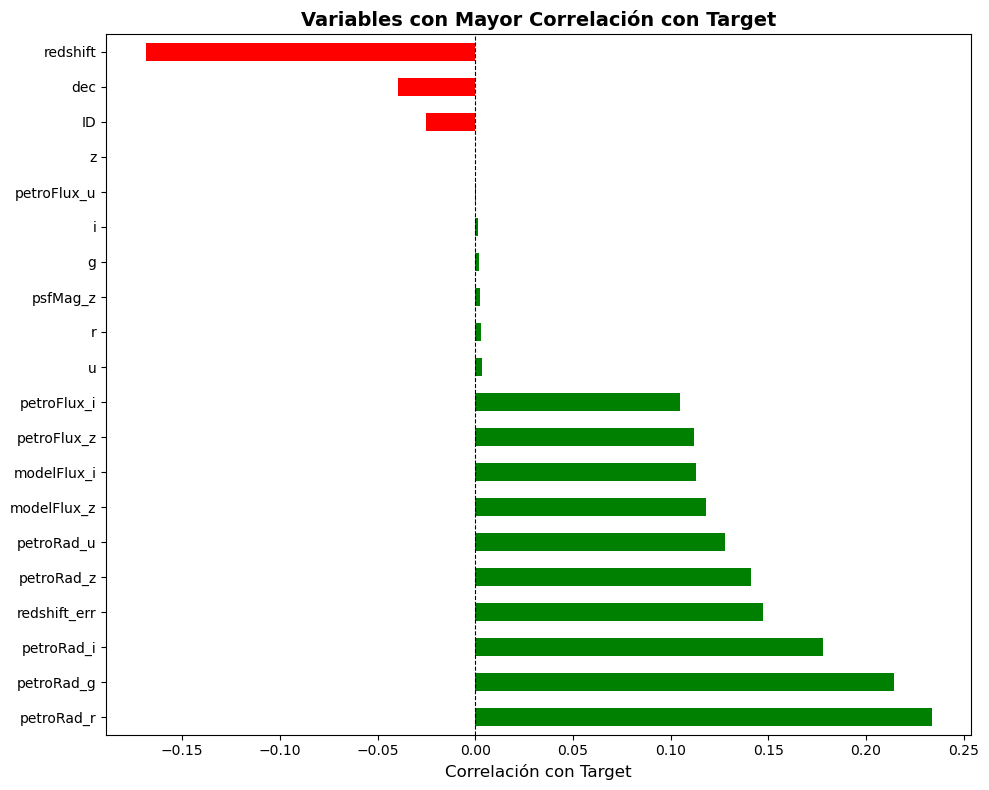

In [9]:
# Analizar la correlación de cada variable con 'target'
correlacion_con_target = df_train.corr()['target'].sort_values(ascending=False)

print("="*70)
print("CORRELACIÓN DE VARIABLES CON TARGET (ordenadas)")
print("="*70)
print(correlacion_con_target)

print("\n" + "="*70)
print("TOP 10 VARIABLES MÁS CORRELACIONADAS CON TARGET")
print("="*70)
print(correlacion_con_target.head(11)[1:])  # Excluir target consigo mismo

print("\n" + "="*70)
print("TOP 10 VARIABLES CON CORRELACIÓN NEGATIVA MÁS FUERTE")
print("="*70)
print(correlacion_con_target.tail(10))

# Visualizar las mejores correlaciones
fig, ax = plt.subplots(figsize=(10, 8))
top_correlaciones = pd.concat([
    correlacion_con_target.head(11)[1:],  # Top 10 positivas
    correlacion_con_target.tail(10)        # Top 10 negativas
])
colores = ['green' if x > 0 else 'red' for x in top_correlaciones.values]
top_correlaciones.plot(kind='barh', color=colores, ax=ax)
ax.set_xlabel('Correlación con Target', fontsize=12)
ax.set_title('Variables con Mayor Correlación con Target', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

## `Analisis de la estructura de los datos -> Limpieza de datos `

In [10]:
# Información básica de los conjuntos de datos
print("="*60)
print("CONJUNTO DE ENTRENAMIENTO (df_train)")
print("="*60)
print(f"Número de filas: {df_train.shape[0]}")
print(f"Número de columnas: {df_train.shape[1]}")
print(f"\nColumnas: {list(df_train.columns)}")
print(f"\nTipos de datos:")
print(df_train.dtypes)

CONJUNTO DE ENTRENAMIENTO (df_train)
Número de filas: 59998
Número de columnas: 41

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err', 'target']

Tipos de datos:
ID                int64
ra              float64
dec             float64
u               float64
g               float64
r               float64
i               float64
z               float64
modelFlux_u     float64
modelFlux_g     float64
modelFlux_r     float64
modelFlux_i     float64
modelFlux_z     float64
petroRad_u      float64
petroRad_g      float64
petroRad_i      float64
petroRad_r      f

In [11]:
print("\n" + "="*60)
print("CONJUNTO DE PRUEBA (df_test)")
print("="*60)
print(f"Número de filas: {df_test.shape[0]}")
print(f"Número de columnas: {df_test.shape[1]}")
print(f"\nColumnas: {list(df_test.columns)}")
print(f"\nTipos de datos:")
print(df_test.dtypes)


CONJUNTO DE PRUEBA (df_test)
Número de filas: 40000
Número de columnas: 40

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err']

Tipos de datos:
ID                int64
ra              float64
dec             float64
u               float64
g               float64
r               float64
i               float64
z               float64
modelFlux_u     float64
modelFlux_g     float64
modelFlux_r     float64
modelFlux_i     float64
modelFlux_z     float64
petroRad_u      float64
petroRad_g      float64
petroRad_i      float64
petroRad_r      float64
petroRad_z

Notamos que entre las muestras se distinguen por una columna "target".

In [12]:
# Estadísticas descriptivas del conjunto de entrenamiento
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS (ENTRENAMIENTO)")
print("="*60)
df_train.describe()


ESTADÍSTICAS DESCRIPTIVAS (ENTRENAMIENTO)


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err,target
count,5.999800e+04,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,1.237659e+18,180.384569,23.449607,18.126597,16.865635,16.563169,16.037549,15.658734,30.055777,96.794240,...,17.691225,17.240204,-1.003568,-0.920878,-0.575042,-0.742777,-0.940974,0.117153,0.000014,0.749942
std,6.100020e+12,75.881812,21.172938,122.705999,122.690772,108.200242,115.664710,122.676784,69.571287,200.295311,...,115.678567,122.690936,122.462459,122.463432,108.004569,115.460737,122.463198,0.100733,0.000013,0.433050
min,1.237646e+18,0.009724,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-41.197150,-4.341232,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000619,0.000002,0.000000
25%,1.237655e+18,138.640727,2.999227,18.765855,17.510082,16.903970,16.533660,16.289337,9.194943,34.240767,...,18.299955,17.996275,0.299999,0.399881,0.419802,0.419094,0.381224,0.055743,0.000008,0.000000
50%,1.237659e+18,181.463258,20.898735,19.351790,18.074330,17.462595,17.095825,16.863815,18.163075,58.910855,...,18.851620,18.568260,0.509175,0.589641,0.605789,0.605105,0.575589,0.085866,0.000011,1.000000
75%,1.237663e+18,223.754866,42.304939,20.090335,18.662650,17.939502,17.604725,17.465097,31.148128,99.017768,...,19.595282,19.303463,0.699986,0.770352,0.775132,0.774710,0.752549,0.135511,0.000015,1.000000
max,1.237681e+18,359.993947,68.694746,30.806540,29.323290,30.430370,30.562360,27.945680,7192.298000,9013.129000,...,25.966680,23.478590,1.000000,1.000000,0.999999,0.999999,0.999998,0.572899,0.000199,1.000000


In [13]:
# Estadísticas descriptivas del conjunto de prueba
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS (PRUEBA)")
print("="*60)
df_test.describe()


ESTADÍSTICAS DESCRIPTIVAS (PRUEBA)


,ID,ra,dec,u,g,r,i,z,modelFlux_u,modelFlux_g,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1.237659e+18,180.863987,23.507057,19.106625,17.847067,17.209577,16.850184,16.139035,31.624601,101.921426,...,19.427684,18.513630,17.728979,-0.003891,0.075965,0.088850,0.088718,-0.441019,0.116154,0.000427
std,6.109423e+12,75.553877,21.092662,70.857800,70.849375,70.844491,70.842393,100.170583,85.962368,267.324073,...,70.851618,70.845623,100.180016,70.706683,70.707181,70.707248,70.707245,99.992128,0.099317,0.082518
min,1.237646e+18,0.008745,-11.200748,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000003
25%,1.237655e+18,138.941503,3.311895,18.756690,17.498020,16.890163,16.516310,16.269150,9.455754,34.726708,...,19.251368,18.289525,17.982107,0.300000,0.397487,0.417304,0.417922,0.381436,0.056027,0.000008
50%,1.237659e+18,181.538095,20.934352,19.347350,18.069970,17.454535,17.085105,16.855590,18.239615,59.155970,...,19.758795,18.837480,18.555120,0.508073,0.586307,0.603080,0.602872,0.575022,0.085830,0.000011
75%,1.237663e+18,224.079153,42.204431,20.060248,18.648165,17.910295,17.577510,17.437775,31.424298,100.171225,...,20.399640,19.573495,19.292885,0.699312,0.766260,0.772215,0.771340,0.751698,0.134560,0.000015
max,1.237681e+18,359.997922,68.695258,30.960000,30.420980,31.173560,27.217020,28.553240,7915.306000,18668.400000,...,25.117280,24.641680,27.043280,0.999984,0.999999,0.999998,1.000000,0.999998,0.568725,16.503710


Observamos valores como -9999.0 que podrian afectar mas adelante. Luego quiero ver cuantas columnas por parametro tienen dicho valor.

In [14]:
# Contar valores anomalos como -9999 en el conjunto de prueba
print("="*60)
print("BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN PRUEBA")
print("="*60)

# Contar valores -9999 por columna
anomalous_counts_test = {}
for col in df_test.columns:
    count_9999 = (df_test[col] == -9999).sum()
    if count_9999 > 0:
        anomalous_counts_test[col] = count_9999
        print(f"\n{col}: {count_9999} valores con 9999 ({count_9999/len(df_test)*100:.2f}%)")

if not anomalous_counts_test:
    print("\nNo se encontraron valores -9999 en el conjunto de prueba")


BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN PRUEBA

u: 2 valores con 9999 (0.01%)

g: 2 valores con 9999 (0.01%)

r: 2 valores con 9999 (0.01%)

i: 2 valores con 9999 (0.01%)

z: 4 valores con 9999 (0.01%)

petroR50_u: 607 valores con 9999 (1.52%)

petroR50_g: 67 valores con 9999 (0.17%)

petroR50_i: 51 valores con 9999 (0.13%)

petroR50_r: 30 valores con 9999 (0.07%)

petroR50_z: 354 valores con 9999 (0.89%)

psfMag_u: 2 valores con 9999 (0.01%)

psfMag_r: 2 valores con 9999 (0.01%)

psfMag_g: 2 valores con 9999 (0.01%)

psfMag_i: 2 valores con 9999 (0.01%)

psfMag_z: 4 valores con 9999 (0.01%)

expAB_u: 2 valores con 9999 (0.01%)

expAB_g: 2 valores con 9999 (0.01%)

expAB_r: 2 valores con 9999 (0.01%)

expAB_i: 2 valores con 9999 (0.01%)

expAB_z: 4 valores con 9999 (0.01%)


In [15]:
# Revisar también valores maximos por columna
print("\n" + "="*60)
print("VALORES MÁXIMOS POR COLUMNA (PRUEBA)")
print("="*60)
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    max_val = df_test[col].max()
    if max_val > 1000:  # Mostrar solo valores grandes
        print(f"{col}: {max_val}")


VALORES MÁXIMOS POR COLUMNA (PRUEBA)
ID: 1237680530279302063
modelFlux_u: 7915.306
modelFlux_g: 18668.4
modelFlux_r: 31755.99
modelFlux_i: 51923.48
modelFlux_z: 79058.46
petroFlux_u: 12842.41
petroFlux_g: 26830.07
petroFlux_i: 73220.98
petroFlux_r: 49008.36
petroFlux_z: 85984.48


In [16]:
# Buscar valores anómalos como -9999 en el conjunto de entrenamiento
print("="*60)
print("BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN ENTRENAMIENTO")
print("="*60)

# Contar valores 9999 por columna
anomalous_counts_train = {}
for col in df_train.columns:
    count_9999 = (df_train[col] == -9999).sum()
    if count_9999 > 0:
        anomalous_counts_train[col] = count_9999
        print(f"\n{col}: {count_9999} valores con -9999 ({count_9999/len(df_train)*100:.2f}%)")

if not anomalous_counts_train:
    print("\nNo se encontraron valores -9999 en el conjunto de entrenamiento")

BÚSQUEDA DE VALORES ANÓMALOS (-9999) EN ENTRENAMIENTO

u: 9 valores con -9999 (0.02%)

g: 9 valores con -9999 (0.02%)

r: 7 valores con -9999 (0.01%)

i: 8 valores con -9999 (0.01%)

z: 9 valores con -9999 (0.02%)

petroR50_u: 963 valores con -9999 (1.61%)

petroR50_g: 87 valores con -9999 (0.15%)

petroR50_i: 80 valores con -9999 (0.13%)

petroR50_r: 38 valores con -9999 (0.06%)

petroR50_z: 569 valores con -9999 (0.95%)

psfMag_u: 9 valores con -9999 (0.02%)

psfMag_r: 7 valores con -9999 (0.01%)

psfMag_g: 9 valores con -9999 (0.02%)

psfMag_i: 8 valores con -9999 (0.01%)

psfMag_z: 9 valores con -9999 (0.02%)

expAB_u: 9 valores con -9999 (0.02%)

expAB_g: 9 valores con -9999 (0.02%)

expAB_r: 7 valores con -9999 (0.01%)

expAB_i: 8 valores con -9999 (0.01%)

expAB_z: 9 valores con -9999 (0.02%)


In [17]:
# Revisar también valores maximos por columna
print("\n" + "="*60)
print("VALORES MÁXIMOS POR COLUMNA (ENTRENAMIENTO)")
print("="*60)
for col in df_train.select_dtypes(include=['float64', 'int64']).columns:
    max_val = df_train[col].max()
    if max_val > 1000:  # Mostrar solo valores grandes
        print(f"{col}: {max_val}")


VALORES MÁXIMOS POR COLUMNA (ENTRENAMIENTO)
ID: 1237680530810929644
modelFlux_u: 7192.298
modelFlux_g: 9013.129
modelFlux_r: 22205.48
modelFlux_i: 37970.16
modelFlux_z: 56688.75
petroFlux_u: 5091.803
petroFlux_g: 10103.74
petroFlux_i: 35993.26
petroFlux_r: 21312.13
petroFlux_z: 50039.27


Notamos que los valores -9999.0 en porcentajes son maximos en los parametros: petroR50_u, petroR50_g, petroR50_r, petroR50_i, petroR50_z.

Procedemos a preparar la muestra de entrenamiento para un entrenamiento optimo del Modelo Random Forest.

In [18]:
# --- 2. Manejo de -9999 (Placeholder)  ---

# Columnas de magnitud y forma identificadas con el placeholder -9999 en el EDA
cols_to_clean = [
    'u', 'g', 'r', 'i', 'z', 'petroR50_u', 'petroR50_g', 'petroR50_r', 'petroR50_i', 'petroR50_z',
    'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z',
    'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z'
]

# Reemplazar -9999.0 por NaN en ambos sets
df_train[cols_to_clean] = df_train[cols_to_clean].replace(-9999.0, np.nan)
df_test[cols_to_clean] = df_test[cols_to_clean].replace(-9999.0, np.nan)

# Calcular la mediana SOLO del set de entrenamiento
imputation_medians = df_train[cols_to_clean].median()

# Imputar NaN con la mediana del set de entrenamiento (evitando Data Leakage)
df_train[cols_to_clean] = df_train[cols_to_clean].fillna(imputation_medians)
df_test[cols_to_clean] = df_test[cols_to_clean].fillna(imputation_medians)

print(f" Valores -9999 reemplazados con la mediana.")



# --- 3. Manejo de Outliers ---

# Aplicar capping a variables importantes - alta correlación con target
outlier_cols_to_cap = [
    'redshift_err', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
]

def handle_outliers_iqr(df, column):
    """Limita los valores extremos de una columna usando el rango intercuartílico (IQR)."""
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Aplicar capping: asignar el límite al valor que lo excede
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Aplicar la función de manejo de outliers a ambos DataFrames
outliers_procesados = 0
for col in outlier_cols_to_cap:
    if col in df_train.columns:
        df_train = handle_outliers_iqr(df_train, col)
        df_test = handle_outliers_iqr(df_test, col)
        outliers_procesados += 1

print(f" Outliers limitados (capping) en {outliers_procesados} variables importantes.")


# --- 5. Guardar los DataFrames Limpios y con Features ---
df_train.to_csv('galaxy_train_cleaned.csv', index=False)
df_test.to_csv('galaxy_test_cleaned.csv', index=False)


 Valores -9999 reemplazados con la mediana.
 Outliers limitados (capping) en 6 variables importantes.


## `Entrenamiento de Modelo`

In [19]:
# Cargar los datos limpios
df_train_clean = pd.read_csv('galaxy_train_cleaned.csv')
df_test_clean = pd.read_csv('galaxy_test_cleaned.csv')

print("="*70)
print("DATOS LIMPIOS CARGADOS")
print("="*70)
print(f"Train shape: {df_train_clean.shape}")
print(f"Test shape: {df_test_clean.shape}")
print(f"\nColumnas: {list(df_train_clean.columns)}")

# Verificar que no haya valores -9999
print("\n" + "="*70)
print("VERIFICACIÓN DE LIMPIEZA")
print("="*70)
print(f"Valores -9999 en train: {(df_train_clean == -9999).sum().sum()}")
print(f"Valores -9999 en test: {(df_test_clean == -9999).sum().sum()}")
print(f"Valores NaN en train: {df_train_clean.isna().sum().sum()}")
print(f"Valores NaN en test: {df_test_clean.isna().sum().sum()}")

DATOS LIMPIOS CARGADOS
Train shape: (59998, 41)
Test shape: (40000, 40)

Columnas: ['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err', 'target']

VERIFICACIÓN DE LIMPIEZA
Valores -9999 en train: 0
Valores -9999 en test: 0
Valores NaN en train: 0
Valores NaN en test: 0


In [20]:
# Separar features y target
# Eliminar columnas que no son features (ID si existe, y target)
X_train = df_train_clean.drop(columns=['target'])
y_train = df_train_clean['target']

# El conjunto de test no tiene 'target', así que lo usamos completo como features
X_test = df_test_clean.copy()

print("="*70)
print("PREPARACIÓN DE DATOS PARA MODELO")
print("="*70)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"\nDistribución de clases en y_train:")
print(y_train.value_counts())
print(f"\nProporción de clases:")
print(y_train.value_counts(normalize=True))

print(f"\nFeatures utilizadas ({len(X_train.columns)}):")
print(list(X_train.columns))

PREPARACIÓN DE DATOS PARA MODELO
X_train shape: (59998, 40)
y_train shape: (59998,)
X_test shape: (40000, 40)

Distribución de clases en y_train:
target
1    44995
0    15003
Name: count, dtype: int64

Proporción de clases:
target
1    0.749942
0    0.250058
Name: proportion, dtype: float64

Features utilizadas (40):
['ID', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'redshift_err']


### Configuración del Random Forest Optimizado para F1-Score

Para maximizar el **F1-Score**, que es el promedio armónico de Precision y Recall, configuraremos el modelo Random Forest con los siguientes parámetros:

**Parámetros clave:**
- `n_estimators`: Número de árboles en el bosque (más árboles = más estabilidad)
- `max_depth`: Profundidad máxima de los árboles (controla overfitting)
- `min_samples_split`: Mínimo de muestras para dividir un nodo
- `min_samples_leaf`: Mínimo de muestras en hojas terminales
- `max_features`: Número de features a considerar en cada split
- `class_weight='balanced'`: **Crucial para F1-Score** - compensa desbalanceo de clases
- `random_state`: Para reproducibilidad

**Estrategia:**
1. Entrenar modelo base con parámetros optimizados
2. Validación cruzada estratificada (mantiene proporción de clases)
3. Evaluación con F1-Score como métrica principal
4. Análisis de importancia de features

In [21]:
# Importar librerías necesarias para Random Forest y evaluación
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    f1_score, 
    precision_score, 
    recall_score,
    accuracy_score,
    roc_auc_score,
    roc_curve
)

print(" Librerías importadas correctamente")

 Librerías importadas correctamente


In [22]:
# Crear y entrenar el modelo Random Forest optimizado para F1-Score
print("="*70)
print("ENTRENANDO RANDOM FOREST")
print("="*70)

# Configuración del modelo
rf_model = RandomForestClassifier(
    n_estimators=200,           # Número de árboles
    max_depth=20,               # Profundidad máxima
    min_samples_split=10,       # Mínimo de muestras para dividir
    min_samples_leaf=4,         # Mínimo de muestras en hojas
    max_features='sqrt',        # Número de features a considerar
    class_weight='balanced',    # IMPORTANTE: balancear clases para F1-Score
    random_state=42,            # Reproducibilidad
    n_jobs=-1,                  # Usar todos los cores disponibles
    verbose=1                   # Mostrar progreso
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

print("\n Modelo entrenado exitosamente")

ENTRENANDO RANDOM FOREST


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.4s



 Modelo entrenado exitosamente


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.3s finished


In [23]:
# Validación Cruzada con F1-Score
print("="*70)
print("VALIDACIÓN CRUZADA (Stratified K-Fold)")
print("="*70)

# Configurar validación cruzada estratificada (mantiene proporción de clases)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Calcular F1-Score con validación cruzada
cv_scores = cross_val_score(
    rf_model, 
    X_train, 
    y_train, 
    cv=skf, 
    scoring='f1',  # Métrica principal: F1-Score
    n_jobs=-1
)

print(f"\nF1-Scores por fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\n{'='*70}")
print(f"MEAN F1-SCORE (CV): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"{'='*70}")

# También calcular otras métricas con CV
cv_precision = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='precision', n_jobs=-1)
cv_recall = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='recall', n_jobs=-1)
cv_accuracy = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1)

print(f"\nOtras métricas (Validación Cruzada):")
print(f"  Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std() * 2:.4f})")
print(f"  Recall:    {cv_recall.mean():.4f} (+/- {cv_recall.std() * 2:.4f})")
print(f"  Accuracy:  {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std() * 2:.4f})")

VALIDACIÓN CRUZADA (Stratified K-Fold)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 176 


F1-Scores por fold:
  Fold 1: 0.9236
  Fold 2: 0.9267
  Fold 3: 0.9264
  Fold 4: 0.9203
  Fold 5: 0.9226

MEAN F1-SCORE (CV): 0.9239 (+/- 0.0048)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 176 


Otras métricas (Validación Cruzada):
  Precision: 0.9301 (+/- 0.0066)
  Recall:    0.9178 (+/- 0.0050)
  Accuracy:  0.8866 (+/- 0.0072)


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   37.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.0s finished


In [24]:
# Evaluar el modelo en el conjunto de entrenamiento
print("="*70)
print("EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO")
print("="*70)

# Predicciones en entrenamiento
y_pred_train = rf_model.predict(X_train)
y_pred_proba_train = rf_model.predict_proba(X_train)

# Calcular métricas
train_f1 = f1_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train[:, 1])

print(f"\nMÉTRICAS EN ENTRENAMIENTO:")
print(f"{'─'*70}")
print(f"  F1-Score:  {train_f1:.4f}  ← MÉTRICA PRINCIPAL")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  ROC-AUC:   {train_roc_auc:.4f}")

print(f"\n{'─'*70}")
print(f"CLASSIFICATION REPORT:")
print(f"{'─'*70}")
print(classification_report(y_train, y_pred_train, 
                          target_names=['Clase 0', 'Clase 1']))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished


EVALUACIÓN EN CONJUNTO DE ENTRENAMIENTO


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s



MÉTRICAS EN ENTRENAMIENTO:
──────────────────────────────────────────────────────────────────────
  F1-Score:  0.9764  ← MÉTRICA PRINCIPAL
  Precision: 0.9890
  Recall:    0.9642
  Accuracy:  0.9651
  ROC-AUC:   0.9954

──────────────────────────────────────────────────────────────────────
CLASSIFICATION REPORT:
──────────────────────────────────────────────────────────────────────
              precision    recall  f1-score   support

     Clase 0       0.90      0.97      0.93     15003
     Clase 1       0.99      0.96      0.98     44995

    accuracy                           0.97     59998
   macro avg       0.94      0.97      0.95     59998
weighted avg       0.97      0.97      0.97     59998



[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished


MATRIZ DE CONFUSIÓN

Distribución de Predicciones:
  True Negatives (TN):  14,522 (24.20%)
  False Positives (FP): 481 (0.80%)
  False Negatives (FN): 1,612 (2.69%)
  True Positives (TP):  43,383 (72.31%)


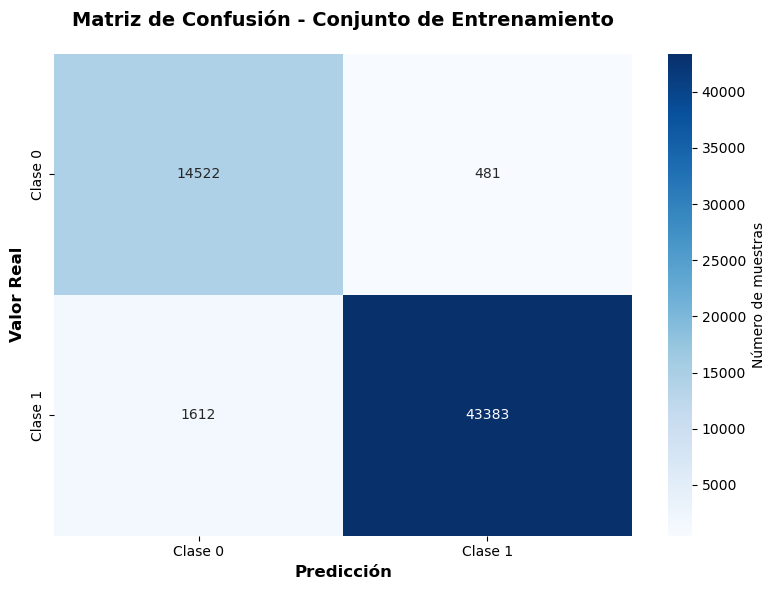

In [25]:
# Visualizar Matriz de Confusión
print("="*70)
print("MATRIZ DE CONFUSIÓN")
print("="*70)

cm = confusion_matrix(y_train, y_pred_train)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'],
            cbar_kws={'label': 'Número de muestras'})

ax.set_xlabel('Predicción', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor Real', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Confusión - Conjunto de Entrenamiento', 
             fontsize=14, fontweight='bold', pad=20)

# Añadir información sobre la matriz
total = cm.sum()
tn, fp, fn, tp = cm.ravel()
print(f"\nDistribución de Predicciones:")
print(f"  True Negatives (TN):  {tn:,} ({tn/total*100:.2f}%)")
print(f"  False Positives (FP): {fp:,} ({fp/total*100:.2f}%)")
print(f"  False Negatives (FN): {fn:,} ({fn/total*100:.2f}%)")
print(f"  True Positives (TP):  {tp:,} ({tp/total*100:.2f}%)")

plt.tight_layout()
plt.show()

IMPORTANCIA DE FEATURES

Top 20 Features más importantes:
     feature  importance
redshift_err    0.160445
    psfMag_u    0.072555
  petroR50_g    0.056184
  petroR50_u    0.054179
  petroRad_g    0.052124
           z    0.039631
 modelFlux_z    0.035418
  petroRad_r    0.034221
 modelFlux_u    0.033587
           u    0.032539
 petroFlux_z    0.029209
  petroR50_r    0.026204
           i    0.023233
    redshift    0.022980
  petroRad_i    0.021887
  petroRad_u    0.021672
 petroFlux_u    0.020175
 modelFlux_i    0.020023
  petroR50_i    0.017781
    psfMag_z    0.017693


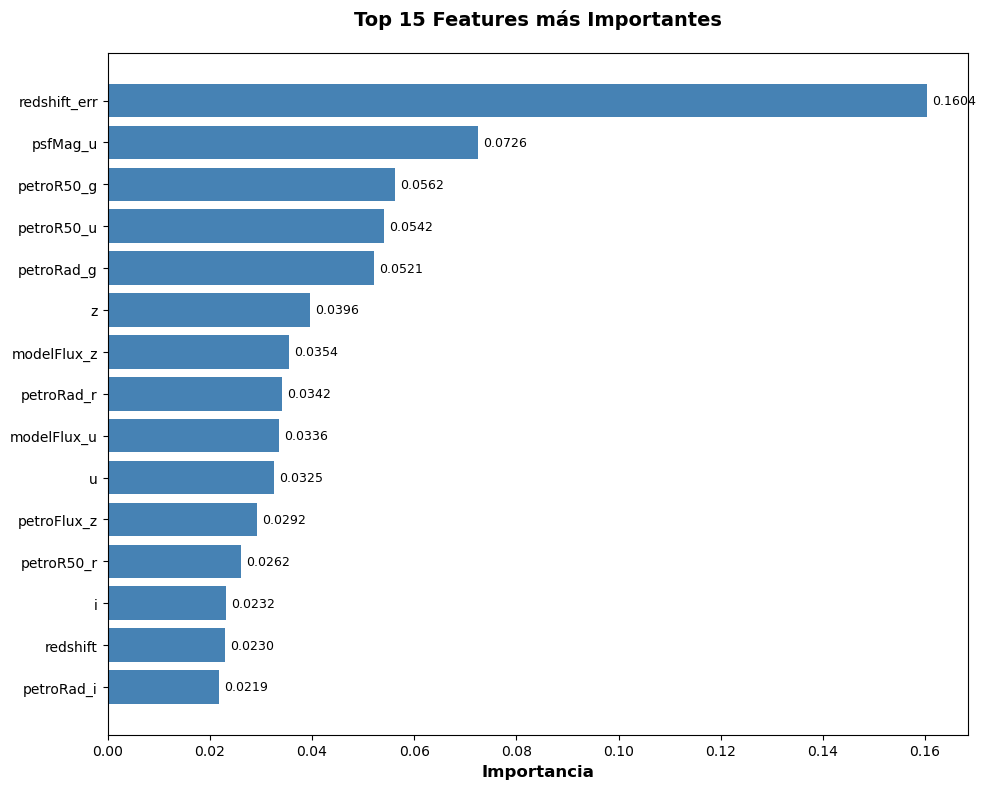


 Número de features que explican el 95% de la importancia: 32


In [26]:
# Análisis de Importancia de Features
print("="*70)
print("IMPORTANCIA DE FEATURES")
print("="*70)

# Obtener importancia de features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 20 Features más importantes:")
print(feature_importance.head(20).to_string(index=False))

# Visualizar Top 15
fig, ax = plt.subplots(figsize=(10, 8))
top_features = feature_importance.head(15)
ax.barh(range(len(top_features)), top_features['importance'], color='steelblue')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['feature'])
ax.set_xlabel('Importancia', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features más Importantes', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()

# Añadir valores en las barras
for i, v in enumerate(top_features['importance']):
    ax.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Calcular importancia acumulada
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
n_features_95 = (feature_importance['cumulative_importance'] <= 0.95).sum()
print(f"\n Número de features que explican el 95% de la importancia: {n_features_95}")

CURVA ROC


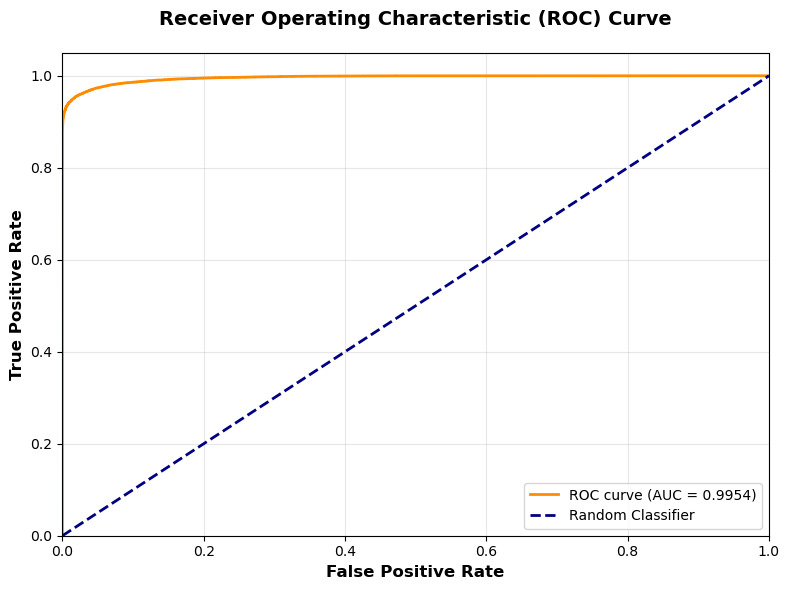


 AUC-ROC: 0.9954


In [27]:
# Curva ROC
print("="*70)
print("CURVA ROC")
print("="*70)

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba_train[:, 1])

# Visualizar
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (AUC = {train_roc_auc:.4f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('Receiver Operating Characteristic (ROC) Curve', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc="lower right", fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n AUC-ROC: {train_roc_auc:.4f}")

## `Predicciones y Generación de Archivo de Submission`

Ahora utilizaremos el modelo entrenado para hacer predicciones sobre el conjunto de prueba y generar el archivo de submission.

In [28]:
# Generar predicciones para el conjunto de test
print("="*70)
print("GENERANDO PREDICCIONES PARA CONJUNTO DE TEST")
print("="*70)

# Hacer predicciones
y_pred_test = rf_model.predict(X_test)
y_pred_proba_test = rf_model.predict_proba(X_test)

print(f"\nNúmero de predicciones: {len(y_pred_test)}")
print(f"\nDistribución de predicciones:")
unique, counts = np.unique(y_pred_test, return_counts=True)
for clase, count in zip(unique, counts):
    print(f"  Clase {clase}: {count:,} ({count/len(y_pred_test)*100:.2f}%)")

print(f"\nPrimeras 10 predicciones: {y_pred_test[:10]}")
print(f"Últimas 10 predicciones:  {y_pred_test[-10:]}")

GENERANDO PREDICCIONES PARA CONJUNTO DE TEST

Número de predicciones: 40000

Distribución de predicciones:
  Clase 0: 10,482 (26.21%)
  Clase 1: 29,518 (73.80%)

Primeras 10 predicciones: [1 1 1 1 0 0 0 1 1 1]
Últimas 10 predicciones:  [1 0 0 1 1 0 1 1 0 1]


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.1s finished


In [29]:
# Crear archivo de submission
print("="*70)
print("CREANDO ARCHIVO DE SUBMISSION")
print("="*70)

# Crear DataFrame de submission con el ID real de las galaxias y predicciones
submission = pd.DataFrame({
    'ID': df_test_clean['ID'],  # ID real de las galaxias del test set
    'submit': y_pred_test
})

# Guardar archivo
submission.to_csv('submission.csv', index=False)

print(f"\n Archivo 'submission.csv' creado exitosamente")
print(f"\nPrimeras 10 filas del archivo:")
print(submission.head(10))
print(f"\nÚltimas 10 filas del archivo:")
print(submission.tail(10))
print(f"\nDimensiones del archivo: {submission.shape}")

# Verificar el formato
print(f"\n{'─'*70}")
print(f"VERIFICACIÓN DE FORMATO:")
print(f"{'─'*70}")
print(f"Columnas: {list(submission.columns)}")
print(f"Valores únicos en 'submit': {sorted(submission['submit'].unique())}")
print(f"Valores nulos: {submission.isnull().sum().sum()}")
print(f"\nEjemplo de IDs reales:")
print(f"  Primer ID:  {submission['ID'].iloc[0]}")
print(f"  Último ID:  {submission['ID'].iloc[-1]}")

CREANDO ARCHIVO DE SUBMISSION

 Archivo 'submission.csv' creado exitosamente

Primeras 10 filas del archivo:
                    ID  submit
0  1237656906355048679       1
1  1237648721225711796       1
2  1237655473438851815       1
3  1237651274034184295       1
4  1237661125612142849       0
5  1237666301091578136       0
6  1237648702974394453       0
7  1237651272438055029       1
8  1237661871339012209       1
9  1237657118947475690       1

Últimas 10 filas del archivo:
                        ID  submit
39990  1237667212134252674       1
39991  1237651272429797825       0
39992  1237661950790467700       0
39993  1237668365311082808       1
39994  1237660342863528331       1
39995  1237653616937599113       0
39996  1237664836466245935       1
39997  1237651272430518418       1
39998  1237657770165469341       0
39999  1237654954278584399       1

Dimensiones del archivo: (40000, 2)

──────────────────────────────────────────────────────────────────────
VERIFICACIÓN DE FORMATO:


In [31]:
# Crear conjunto de validación para evaluar el rendimiento estimado en test
print("="*70)
print("CREANDO CONJUNTO DE VALIDACIÓN")
print("="*70)

# Dividir los datos de entrenamiento en train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, 
    test_size=0.2,      # 20% para validación
    random_state=42,    # Reproducibilidad
    stratify=y_train    # Mantener proporción de clases
)

print(f"Train split shape: {X_train_split.shape}")
print(f"Validation split shape: {X_val_split.shape}")
print(f"\nDistribución en train split: {y_train_split.value_counts()}")
print(f"Distribución en validation split: {y_val_split.value_counts()}")

# Entrenar modelo solo con el subset de entrenamiento
rf_val_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_val_model.fit(X_train_split, y_train_split)

# Hacer predicciones en el conjunto de validación
y_val_pred = rf_val_model.predict(X_val_split)
y_val_proba = rf_val_model.predict_proba(X_val_split)

# Calcular métricas de validación
val_f1 = f1_score(y_val_split, y_val_pred)
val_precision = precision_score(y_val_split, y_val_pred)
val_recall = recall_score(y_val_split, y_val_pred)
val_accuracy = accuracy_score(y_val_split, y_val_pred)

print(f"\n{'='*70}")
print(f"MÉTRICAS EN CONJUNTO DE VALIDACIÓN (Estimación para Test)")
print(f"{'='*70}")
print(f"  F1-Score:  {val_f1:.4f}")
print(f"  Precision: {val_precision:.4f}")
print(f"  Recall:    {val_recall:.4f}")
print(f"  Accuracy:  {val_accuracy:.4f}")

CREANDO CONJUNTO DE VALIDACIÓN
Train split shape: (47998, 40)
Validation split shape: (12000, 40)

Distribución en train split: target
1    35996
0    12002
Name: count, dtype: int64
Distribución en validation split: target
1    8999
0    3001
Name: count, dtype: int64

MÉTRICAS EN CONJUNTO DE VALIDACIÓN (Estimación para Test)
  F1-Score:  0.9209
  Precision: 0.9283
  Recall:    0.9135
  Accuracy:  0.8822


REPORTE DE CLASIFICACIÓN - CONJUNTO DE VALIDACIÓN
              precision    recall  f1-score   support

     Clase 0       0.75      0.79      0.77      3001
     Clase 1       0.93      0.91      0.92      8999

    accuracy                           0.88     12000
   macro avg       0.84      0.85      0.85     12000
weighted avg       0.88      0.88      0.88     12000



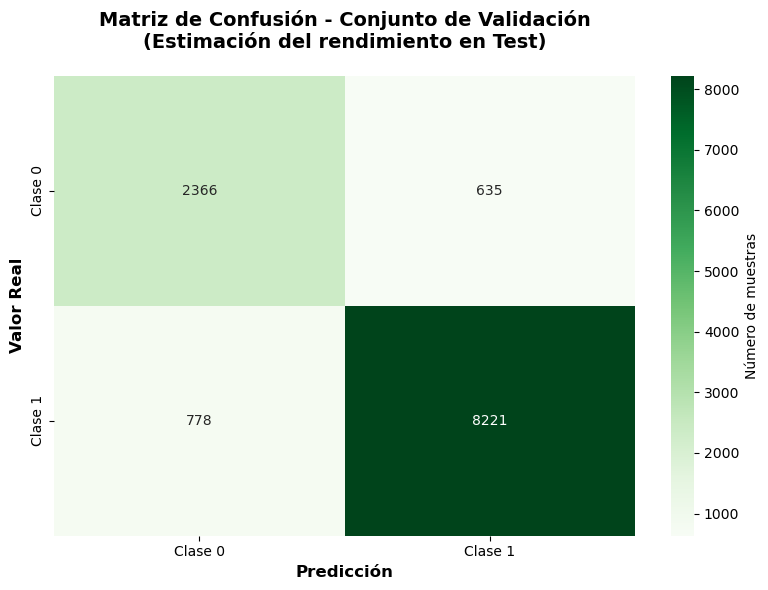


──────────────────────────────────────────────────────────────────────
ANÁLISIS DE ERRORES EN VALIDACIÓN
──────────────────────────────────────────────────────────────────────
  True Negatives (Correctos Clase 0):  2,366 (19.72%)
  True Positives (Correctos Clase 1):  8,221 (68.51%)
  False Positives (Errores Tipo I):    635 (5.29%)
  False Negatives (Errores Tipo II):   778 (6.48%)

  Total de errores: 1,413 (11.77%)
  Total de aciertos: 10,587 (88.22%)


In [32]:
# Reporte detallado de clasificación en validación
print("="*70)
print("REPORTE DE CLASIFICACIÓN - CONJUNTO DE VALIDACIÓN")
print("="*70)
print(classification_report(y_val_split, y_val_pred, 
                          target_names=['Clase 0', 'Clase 1']))

# Matriz de confusión para validación
cm_val = confusion_matrix(y_val_split, y_val_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'],
            cbar_kws={'label': 'Número de muestras'})

ax.set_xlabel('Predicción', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor Real', fontsize=12, fontweight='bold')
ax.set_title('Matriz de Confusión - Conjunto de Validación\n(Estimación del rendimiento en Test)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Análisis de errores
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()
total_val = cm_val.sum()

print(f"\n{'─'*70}")
print(f"ANÁLISIS DE ERRORES EN VALIDACIÓN")
print(f"{'─'*70}")
print(f"  True Negatives (Correctos Clase 0):  {tn_val:,} ({tn_val/total_val*100:.2f}%)")
print(f"  True Positives (Correctos Clase 1):  {tp_val:,} ({tp_val/total_val*100:.2f}%)")
print(f"  False Positives (Errores Tipo I):    {fp_val:,} ({fp_val/total_val*100:.2f}%)")
print(f"  False Negatives (Errores Tipo II):   {fn_val:,} ({fn_val/total_val*100:.2f}%)")
print(f"\n  Total de errores: {fp_val + fn_val:,} ({(fp_val + fn_val)/total_val*100:.2f}%)")
print(f"  Total de aciertos: {tp_val + tn_val:,} ({(tp_val + tn_val)/total_val*100:.2f}%)")

## ` Mejoras del Modelo - Feature Engineering`


In [33]:
def create_astronomical_features(df):
    """
    Crea features astronómicas derivadas para mejorar la clasificación.
    """
    df_enhanced = df.copy()
    
    print("Creando nuevas features...")
    
    # 1. COLORES (diferencias entre magnitudes) - 
    df_enhanced['color_u_g'] = df_enhanced['u'] - df_enhanced['g']
    df_enhanced['color_g_r'] = df_enhanced['g'] - df_enhanced['r']
    df_enhanced['color_r_i'] = df_enhanced['r'] - df_enhanced['i']
    df_enhanced['color_i_z'] = df_enhanced['i'] - df_enhanced['z']
    df_enhanced['color_u_r'] = df_enhanced['u'] - df_enhanced['r']  # Color general
    df_enhanced['color_g_i'] = df_enhanced['g'] - df_enhanced['i']
    
    # 2. RATIOS DE FLUJO (comparaciones entre flujos en diferentes bandas)
    for banda1, banda2 in [('u', 'r'), ('g', 'i'), ('r', 'z')]:
        flux1 = f'modelFlux_{banda1}'
        flux2 = f'modelFlux_{banda2}'
        if flux1 in df_enhanced.columns and flux2 in df_enhanced.columns:
            # Evitar división por cero
            df_enhanced[f'flux_ratio_{banda1}_{banda2}'] = np.where(
                df_enhanced[flux2] != 0,
                df_enhanced[flux1] / (df_enhanced[flux2] + 1e-10),
                0
            )
    
    # 3. CONCENTRACIÓN (ratio entre R50 y Rad)
    for banda in ['u', 'g', 'r', 'i', 'z']:
        r50 = f'petroR50_{banda}'
        rad = f'petroRad_{banda}'
        if r50 in df_enhanced.columns and rad in df_enhanced.columns:
            df_enhanced[f'concentration_{banda}'] = np.where(
                df_enhanced[rad] != 0,
                df_enhanced[r50] / (df_enhanced[rad] + 1e-10),
                0
            )
    
    # 4. TAMAÑOS PROMEDIO
    if all(f'petroR50_{b}' in df_enhanced.columns for b in ['g', 'r', 'i']):
        df_enhanced['avg_petroR50'] = (
            df_enhanced['petroR50_g'] + 
            df_enhanced['petroR50_r'] + 
            df_enhanced['petroR50_i']
        ) / 3
    
    # 5. DIFERENCIA PSF - MODEL (indica si es puntual o extendida)
    for banda in ['u', 'g', 'r', 'i', 'z']:
        psf = f'psfMag_{banda}'
        model = banda
        if psf in df_enhanced.columns and model in df_enhanced.columns:
            df_enhanced[f'psf_model_diff_{banda}'] = df_enhanced[psf] - df_enhanced[model]
    
    # 6. REDSHIFT NORMALIZADO
    if 'redshift' in df_enhanced.columns and 'redshift_err' in df_enhanced.columns:
        df_enhanced['redshift_snr'] = np.where(
            df_enhanced['redshift_err'] != 0,
            df_enhanced['redshift'] / (df_enhanced['redshift_err'] + 1e-10),
            0
        )
    
    print(f" Features creadas. Shape anterior: {df.shape}, Shape nueva: {df_enhanced.shape}")
    print(f"   Se añadieron {df_enhanced.shape[1] - df.shape[1]} nuevas features")
    
    return df_enhanced

# Aplicar feature engineering a los datos limpios
print("="*70)
print("FEATURE ENGINEERING - CREANDO VARIABLES DERIVADAS")
print("="*70)

df_train_enhanced = create_astronomical_features(df_train_clean)
df_test_enhanced = create_astronomical_features(df_test_clean)

# Verificar que no haya NaN o Inf
print("\nVerificando valores inválidos...")
print(f"NaN en train: {df_train_enhanced.isna().sum().sum()}")
print(f"NaN en test: {df_test_enhanced.isna().sum().sum()}")
print(f"Inf en train: {np.isinf(df_train_enhanced.select_dtypes(include=[np.number])).sum().sum()}")
print(f"Inf en test: {np.isinf(df_test_enhanced.select_dtypes(include=[np.number])).sum().sum()}")

# Reemplazar Inf por valores grandes finitos
df_train_enhanced.replace([np.inf, -np.inf], [1e10, -1e10], inplace=True)
df_test_enhanced.replace([np.inf, -np.inf], [1e10, -1e10], inplace=True)

FEATURE ENGINEERING - CREANDO VARIABLES DERIVADAS
Creando nuevas features...
 Features creadas. Shape anterior: (59998, 41), Shape nueva: (59998, 62)
   Se añadieron 21 nuevas features
Creando nuevas features...
 Features creadas. Shape anterior: (40000, 40), Shape nueva: (40000, 61)
   Se añadieron 21 nuevas features

Verificando valores inválidos...
NaN en train: 0
NaN en test: 0
Inf en train: 0
Inf en test: 0


In [34]:
# Preparar datos mejorados para el modelo
print("="*70)
print("PREPARANDO DATOS MEJORADOS PARA MODELO")
print("="*70)

# Separar features y target
X_train_v2 = df_train_enhanced.drop(columns=['target'])
y_train_v2 = df_train_enhanced['target']
X_test_v2 = df_test_enhanced.copy()

print(f"X_train_v2 shape: {X_train_v2.shape}")
print(f"y_train_v2 shape: {y_train_v2.shape}")
print(f"X_test_v2 shape: {X_test_v2.shape}")

print(f"\nNuevas features añadidas:")
new_features = set(X_train_v2.columns) - set(X_train.columns)
for i, feat in enumerate(sorted(new_features), 1):
    print(f"  {i}. {feat}")

PREPARANDO DATOS MEJORADOS PARA MODELO
X_train_v2 shape: (59998, 61)
y_train_v2 shape: (59998,)
X_test_v2 shape: (40000, 61)

Nuevas features añadidas:
  1. avg_petroR50
  2. color_g_i
  3. color_g_r
  4. color_i_z
  5. color_r_i
  6. color_u_g
  7. color_u_r
  8. concentration_g
  9. concentration_i
  10. concentration_r
  11. concentration_u
  12. concentration_z
  13. flux_ratio_g_i
  14. flux_ratio_r_z
  15. flux_ratio_u_r
  16. psf_model_diff_g
  17. psf_model_diff_i
  18. psf_model_diff_r
  19. psf_model_diff_u
  20. psf_model_diff_z
  21. redshift_snr


In [35]:
# Entrenar modelo MEJORADO con nuevas features
print("="*70)
print("ENTRENANDO RANDOM FOREST V2 - CON FEATURE ENGINEERING")
print("="*70)

# Modelo mejorado con más árboles y mejor configuración
rf_model_v2 = RandomForestClassifier(
    n_estimators=300,           # Más árboles para mayor estabilidad
    max_depth=25,               # Profundidad mayor para capturar patrones complejos
    min_samples_split=8,        # Menos restrictivo
    min_samples_leaf=3,         # Menos restrictivo
    max_features='sqrt',        
    class_weight='balanced',    
    random_state=42,            
    n_jobs=-1,                  
    verbose=1,
    bootstrap=True,             # Bagging activado
    max_samples=0.8             # Usar 80% de las muestras por árbol
)

# Entrenar el modelo
rf_model_v2.fit(X_train_v2, y_train_v2)

print("\n Modelo V2 entrenado exitosamente")

ENTRENANDO RANDOM FOREST V2 - CON FEATURE ENGINEERING


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.9s



 Modelo V2 entrenado exitosamente


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   14.7s finished


In [36]:
# Validación Cruzada del Modelo V2
print("="*70)
print("VALIDACIÓN CRUZADA - MODELO V2 (CON FEATURE ENGINEERING)")
print("="*70)

# Validación cruzada
cv_scores_v2 = cross_val_score(
    rf_model_v2, 
    X_train_v2, 
    y_train_v2, 
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
    scoring='f1',
    n_jobs=-1
)

print(f"\nF1-Scores por fold (Modelo V2):")
for i, score in enumerate(cv_scores_v2, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\n{'='*70}")
print(f"COMPARACIÓN DE MODELOS")
print(f"{'='*70}")
print(f"  Modelo Original (V1): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"  Modelo Mejorado (V2): {cv_scores_v2.mean():.4f} (+/- {cv_scores_v2.std() * 2:.4f})")
print(f"  Mejora: {(cv_scores_v2.mean() - cv_scores.mean()):.4f}")
print(f"{'='*70}")

if cv_scores_v2.mean() > cv_scores.mean():
    print(f"\n ¡MEJORA DETECTADA! El modelo V2 es {(cv_scores_v2.mean() - cv_scores.mean())*100:.2f}% mejor")
else:
    print(f"\n El modelo V2 no mejoró. Diferencia: {(cv_scores_v2.mean() - cv_scores.mean())*100:.2f}%")

VALIDACIÓN CRUZADA - MODELO V2 (CON FEATURE ENGINEERING)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  26 


F1-Scores por fold (Modelo V2):
  Fold 1: 0.9327
  Fold 2: 0.9336
  Fold 3: 0.9337
  Fold 4: 0.9298
  Fold 5: 0.9323

COMPARACIÓN DE MODELOS
  Modelo Original (V1): 0.9239 (+/- 0.0048)
  Modelo Mejorado (V2): 0.9324 (+/- 0.0028)
  Mejora: 0.0085

 ¡MEJORA DETECTADA! El modelo V2 es 0.85% mejor


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.1s finished


In [ ]:
# Generar predicciones con el Modelo V2
print("Generando predicciones con Modelo V2...")
y_pred_v2 = rf_model_v2.predict(X_test_v2)

# Crear archivo de submission mejorado
submission_v2 = pd.DataFrame({
    'ID': df_test_clean['ID'],
    'submit': y_pred_v2
})

# Verificar distribución de clases predichas
print(f"\nDistribución de predicciones (Modelo V2):")
print(submission_v2['submit'].value_counts())
print(f"\nProporción clase 1: {submission_v2['submit'].mean():.4f}")

# Guardar archivo
submission_v2.to_csv('submission_v2.csv', index=False)
print(f"\n Archivo 'submission_v2.csv' creado exitosamente con {len(submission_v2)} predicciones")
print("\nPrimeras filas del archivo:")
print(submission_v2.head(10))

Generando predicciones con Modelo V2...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s



Distribución de predicciones (Modelo V2):
submit
1    30250
0     9750
Name: count, dtype: int64

Proporción clase 1: 0.7562

✅ Archivo 'submission_v2.csv' creado exitosamente con 40000 predicciones

Primeras filas del archivo:
                    ID  submit
0  1237656906355048679       1
1  1237648721225711796       1
2  1237655473438851815       1
3  1237651274034184295       1
4  1237661125612142849       0
5  1237666301091578136       0
6  1237648702974394453       1
7  1237651272438055029       1
8  1237661871339012209       1
9  1237657118947475690       1


[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.2s finished


TOP 20 FEATURES MÁS IMPORTANTES (MODELO V2)

          feature  importance
       color_u_g    0.094593
       color_u_r    0.084786
  flux_ratio_u_r    0.080421
    redshift_err    0.079138
    redshift_snr    0.033884
      petroRad_g    0.031834
      petroR50_g    0.031542
      petroR50_u    0.027956
       color_g_r    0.027122
       color_i_z    0.024387
       color_g_i    0.022835
  flux_ratio_g_i    0.021533
       color_r_i    0.020200
        psfMag_u    0.019844
     modelFlux_z    0.019713
psf_model_diff_u    0.019559
               z    0.019072
      petroRad_r    0.018647
      petroR50_r    0.018415
  flux_ratio_r_z    0.014680


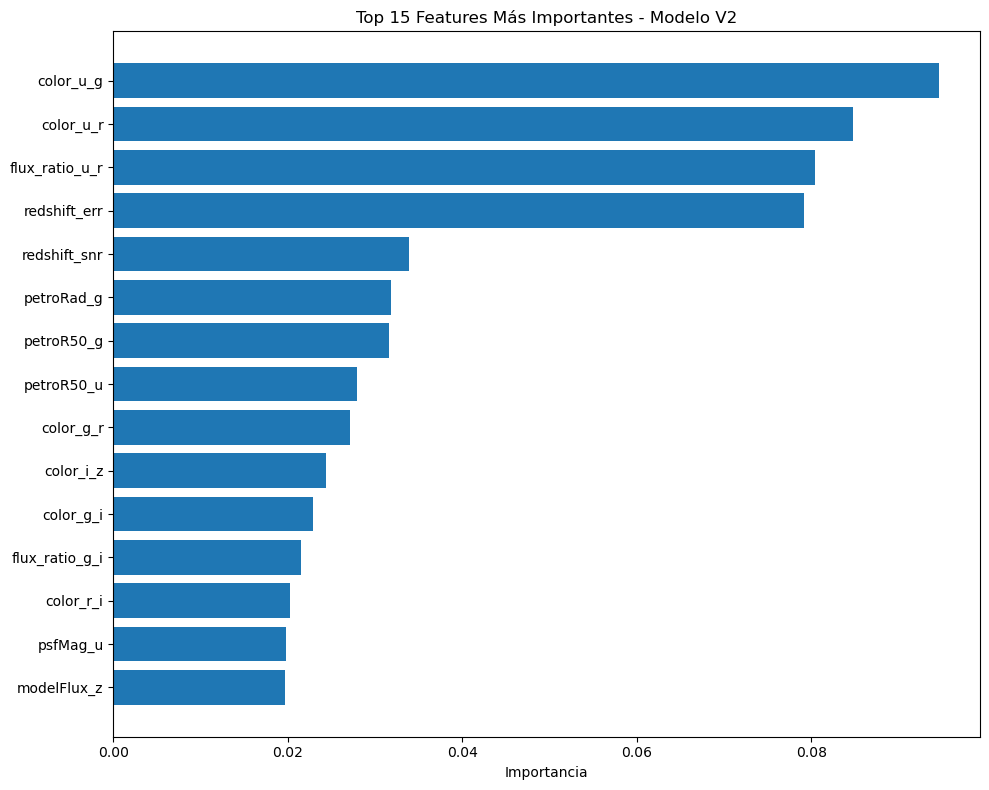


IMPORTANCIA DE NUEVAS FEATURES

Total de nuevas features: 21
Nuevas features en top 20: 20

Nuevas features más importantes:
         feature  importance
       color_u_g    0.094593
       color_u_r    0.084786
  flux_ratio_u_r    0.080421
    redshift_snr    0.033884
       color_g_r    0.027122
       color_i_z    0.024387
       color_g_i    0.022835
  flux_ratio_g_i    0.021533
       color_r_i    0.020200
psf_model_diff_u    0.019559


In [ ]:
# Análisis de Importancia de Features
print("="*70)
print("TOP 20 FEATURES MÁS IMPORTANTES (MODELO V2)")
print("="*70)

# Obtener importancias
feature_importances_v2 = pd.DataFrame({
    'feature': X_train_v2.columns,
    'importance': rf_model_v2.feature_importances_
}).sort_values('importance', ascending=False)

# Mostrar top 20
print("\n", feature_importances_v2.head(20).to_string(index=False))

# Visualizar top 15 features
plt.figure(figsize=(10, 8))
top_features = feature_importances_v2.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 15 Features Más Importantes - Modelo V2')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Comparar features originales vs nuevas
new_features = [f for f in X_train_v2.columns if f not in X_train.columns]
print(f"\n{'='*70}")
print(f"IMPORTANCIA DE NUEVAS FEATURES")
print(f"{'='*70}")
new_feat_importance = feature_importances_v2[feature_importances_v2['feature'].isin(new_features)]
print(f"\nTotal de nuevas features: {len(new_features)}")
print(f"Nuevas features en top 20: {len(new_feat_importance.head(20))}")
print(f"\nNuevas features más importantes:")
print(new_feat_importance.head(10).to_string(index=False))